### Merge Together all Seperate Station Data into One Table
* Convert the data from units of inches to milimeters

In [14]:
import pandas as pd

# List of station names and file paths (must match filenames and column renaming)
stations = ['951EXT_R', 'BCA15', 'BCNPA4_R', 'BCA17', 'BCA18', 'COCO1_R']
folder = 'Stat_Data'

# Empty list to store individual dataframes
station_dfs = []

# Loop through each station, load and preprocess
for station in stations:
    file_path = f'{station}.csv'
    df = pd.read_csv(file_path)
    df['Daily Date'] = pd.to_datetime(df['Daily Date'])
    df.set_index('Daily Date', inplace=True)
    df = df[['Data Value']].rename(columns={'Data Value': station})
    station_dfs.append(df)

# Combine all stations into a single DataFrame
Observed_data = pd.concat(station_dfs, axis=1)

# (Optional) Display or save
print(Observed_data.head())
# Observed_data.to_csv(f'{folder}/Combined_Observed_Data.csv')


C:\Users\andyt\AppData\Local\Temp\ipykernel_25012\4232167996.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Daily Date'] = pd.to_datetime(df['Daily Date'])
C:\Users\andyt\AppData\Local\Temp\ipykernel_25012\4232167996.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Daily Date'] = pd.to_datetime(df['Daily Date'])
C:\Users\andyt\AppData\Local\Temp\ipykernel_25012\4232167996.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Daily Date'] = pd.to_datetime(df['Daily Date'])
C:\Users\andyt\AppData\Local\Temp\ipykernel_25012\4232167996.py:14: UserWarning: C

            951EXT_R  BCA15  BCNPA4_R  BCA17  BCA18  COCO1_R
Daily Date                                                  
2007-10-01      0.01   0.14      0.08   0.11   0.35     0.00
2007-10-02      0.00   0.22      0.07   0.04   0.13     0.01
2007-10-03      0.08   0.03      0.90   0.57   0.38     0.01
2007-10-04      0.45   0.01      0.01   0.01   0.07     0.34
2007-10-05      0.35   0.18      0.29   0.82   0.14     0.24


In [15]:
Observed_data1= Observed_data[stations]*25.4 
Observed_data1

,951EXT_R,BCA15,BCNPA4_R,BCA17,BCA18,COCO1_R
Daily Date,,,,,,
2007-10-01,0.254,3.556,2.032,2.794,8.890,0.000
2007-10-02,0.000,5.588,1.778,1.016,3.302,0.254
2007-10-03,2.032,0.762,22.860,14.478,9.652,0.254
2007-10-04,11.430,0.254,0.254,0.254,1.778,8.636
2007-10-05,8.890,4.572,7.366,20.828,3.556,6.096
...,...,...,...,...,...,...
2017-01-23,2.032,31.750,14.732,9.652,30.480,3.810
2017-01-24,0.000,0.000,0.000,0.254,0.000,0.000
2017-01-25,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
Observed_data1.to_csv('Observetions.csv', index=True) 


### Convert The Stations Geograpic Corrdinate System to Cartesian Corrdinate

In [7]:
def dms_to_decimal(degrees, minutes, seconds, is_latitude):
    """
    Convert degrees, minutes, and seconds to decimal degrees.
    
    :param degrees: int, degrees value
    :param minutes: int, minutes value
    :param seconds: float, seconds value
    :param is_latitude: bool, True if latitude, False if longitude
    :return: float, decimal degrees
    """
    decimal_degrees = degrees + (minutes / 60) + (seconds / 3600)
    
    if (is_latitude and degrees > 90) or (not is_latitude and degrees > 180):
        decimal_degrees *= -1  # Apply negative for Southern Hemisphere (lat) or Western Hemisphere (long)
    
    return round(decimal_degrees, 6)  # Format output to 6 decimal places

def convert_string_to_dms(value_str, is_latitude):
    """
    Convert a string of the format 'DDMMSS.SSS' into DMS components.
    
    :param value_str: str, formatted as 'DDMMSS.SSS'
    :param is_latitude: bool, True if latitude, False if longitude
    :return: float, decimal degrees
    """
    value_str = value_str.strip()
    
    if '.' in value_str:
        main_part, decimal_part = value_str.split('.')
        seconds = float(main_part[4:] + '.' + decimal_part)
    else:
        seconds = float(value_str[4:])
    
    degrees = int(value_str[:2])
    minutes = int(value_str[2:4])
    
    return dms_to_decimal(degrees, minutes, seconds, is_latitude)

def convert_stations(stations):
    """
    Convert a dictionary of stations with DMS string coordinates to decimal degrees.
    
    :param stations: dict, with {'station_name': (x, y)} where x (latitude) and y (longitude) are DMS strings
    :return: dict, with {'station_name': (a, b)} where a and b are decimal degrees as floats
    """
    converted_stations = {}
    for station, (x, y) in stations.items():
        a = convert_string_to_dms(x, True)  # Convert latitude
        b = convert_string_to_dms(y, False)  # Convert longitude
        b = -b  # Ensure longitudes are negative for Western Hemisphere
        converted_stations[station] = (a, b)
    return converted_stations


def convert_to_double_quotes(input_dict):
    """
    Convert the keys of a dictionary to be enclosed in double quotes.
    
    :param input_dict: dict, dictionary where keys need to be converted to double quotes
    :return: dict, new dictionary with double-quoted keys
    """
    # Use a dictionary comprehension to change keys to be enclosed in double quotes
    return {f'"{key}"': value for key, value in input_dict.items()}


In [3]:
stations = {
    'BCA15': ('260222.542', '810137.624'),
    '951EXT_R': ('261809.306', '814118.29'),
    'BCNPA4_R': ('255727.344', '810613.249'),
    'BCA17': ('261217.81', '811006.46'),
    'BCA18': ('261223.646', '805900.985'),
    'COCO1_R': ('261622.311', '814647.3')
}

converted_stations = convert_stations(stations)
print(converted_stations)

{'BCA15': (26.039595, -81.027118), '951EXT_R': (26.302585, -81.688414), 'BCNPA4_R': (25.957596, -81.10368), 'BCA17': (26.204947, -81.168461), 'BCA18': (26.206568, -80.983607), 'COCO1_R': (26.272864, -81.779806)}


In [4]:
input_dict = converted_stations
converted_dict = convert_to_double_quotes(input_dict)
print(converted_dict)

{'"BCA15"': (26.039595, -81.027118), '"951EXT_R"': (26.302585, -81.688414), '"BCNPA4_R"': (25.957596, -81.10368), '"BCA17"': (26.204947, -81.168461), '"BCA18"': (26.206568, -80.983607), '"COCO1_R"': (26.272864, -81.779806)}


In [5]:
station_corrdinates= {"BCA15": (26.039595, -81.027118),
           "951EXT_R": (26.302585, -81.688414),
           "BCNPA4_R": (25.957596, -81.10368), 
           "BCA17": (26.204947, -81.168461), 
           "BCA18": (26.206568, -80.983607), 
           "COCO1_R": (26.272864, -81.779806)
}
station_corrdinates

{'BCA15': (26.039595, -81.027118),
 '951EXT_R': (26.302585, -81.688414),
 'BCNPA4_R': (25.957596, -81.10368),
 'BCA17': (26.204947, -81.168461),
 'BCA18': (26.206568, -80.983607),
 'COCO1_R': (26.272864, -81.779806)}

### Use the converted corrdinates of the stations, to download the time series downscaled data from the climate models

In [1]:
import requests
import xarray as xr
import io
import pandas as pd

# Define station locations
stations = {
 'BCA15': (26.039595, -81.027118),
 '951EXT_R': (26.302585, -81.688414),
 'BCNPA4_R': (25.957596, -81.10368),
 'BCA17': (26.204947, -81.168461),
 'BCA18': (26.206568, -80.983607),
 'COCO1_R': (26.272864, -81.779806)
}

models = [
    'ACCESS-CM2', 'BCC-CSM2-MR', 'CNRM-ESM2-1',
    'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM',
]
base_url = "https://hydroshare.ornl.gov/files/9505/SWA9505V3"
variable_name = "prcp"
start_year, end_year = 2007, 2017


def fetch_netcdf_from_url(url):
    """Fetch the NetCDF file from the given URL."""
    response = requests.get(url)
    if response.status_code == 200:
        return io.BytesIO(response.content)
    else:
        raise Exception(f"Failed to download NetCDF file. Status code: {response.status_code}")


def extract_pixel_data(model, base_url, variable_name, start_year, end_year, lat, lon):
    """Extract daily data for a specific location from a single model over multiple years."""
    data_list = []
    variant_label = "r1i1p1f2" if model == "CNRM-ESM2-1" else "r1i1p1f1"

    for year in range(start_year, end_year + 1):
        url = f"{base_url}/{model}_ssp585_{variant_label}_RegCM_Daymet/{variable_name}/{model}_ssp585_{variant_label}_RegCM_Daymet_VIC4_{variable_name}_{year}.nc"
        #print(f"Fetching data from: {url}")

        # Fetch the NetCDF file
        netcdf_file = fetch_netcdf_from_url(url)

        # Read the NetCDF dataset
        ds = xr.open_dataset(netcdf_file)
        
        # Check if the variable exists
        if variable_name not in ds.variables:
            raise Exception(f"'{variable_name}' variable not found in {url}")

        # Select the closest grid cell to the given lat/lon
        pixel_data = ds[variable_name].sel(lat=lat, lon=lon, method="nearest")
        
        # Convert to DataFrame
        df = pixel_data.to_dataframe().reset_index()
        df = df[['time', variable_name]]  # Keep only time and variable columns
        df.rename(columns={variable_name: model}, inplace=True)  # Rename column with model name

        # Divide the values by 25.4
        df[model] = df[model]   # Division by 25.4 if you would like to convert from mm to inch

        data_list.append(df)

    return pd.concat(data_list, ignore_index=True)

# Loop through stations
for station, (lat, lon) in stations.items():
    print(f"Processing station: {station} at ({lat}, {lon})")
    merged_df = None
    
    # Extract data for each model and merge
    for model in models:
        pixel_data_df = extract_pixel_data(model, base_url, variable_name, start_year, end_year, lat, lon)
        
        if merged_df is None:
            merged_df = pixel_data_df
        else:
            merged_df = pd.merge(merged_df, pixel_data_df, on='time', how='outer')
    
    # Save the extracted data to a CSV file
    output_filename = f"Data/{station}.csv"
    merged_df.to_csv(output_filename, index=False)
    print(f"Data for station {station} saved to {output_filename}.")


Processing station: BCA17 at (26.204947, -81.168461)
Data for station BCA17 saved to Data/BCA17.csv.
Processing station: BCA18 at (26.206568, -80.983607)
Data for station BCA18 saved to Data/BCA18.csv.
Processing station: COCO1_R at (26.272864, -81.779806)
Data for station COCO1_R saved to Data/COCO1_R.csv.


### Statistical Evaluation of Climate Model Using Q-Q Plots
This script performs a comparative analysis of observed and modeled climate data across multiple weather stations.

##### Data Loading & Merging:

* Reads in observational data from a CSV file.
* Loads modeled climate data for various stations from corresponding CSV files.
* Merges observational data with modeled data for each station, handling missing values.
* Statistical Analysis & Visualization:

Computes statistical metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score to evaluate model performance.
* Generates Q-Q plots (Quantile-Quantile plots) to compare the distributions of observed and modeled values for each station.
* Adds a 1:1 reference line to visualize model accuracy.

##### Plotting & Saving Results:
* Organizes Q-Q plots in a grid layout for multiple stations.
* Saves the generated plots as an image for further analysis.

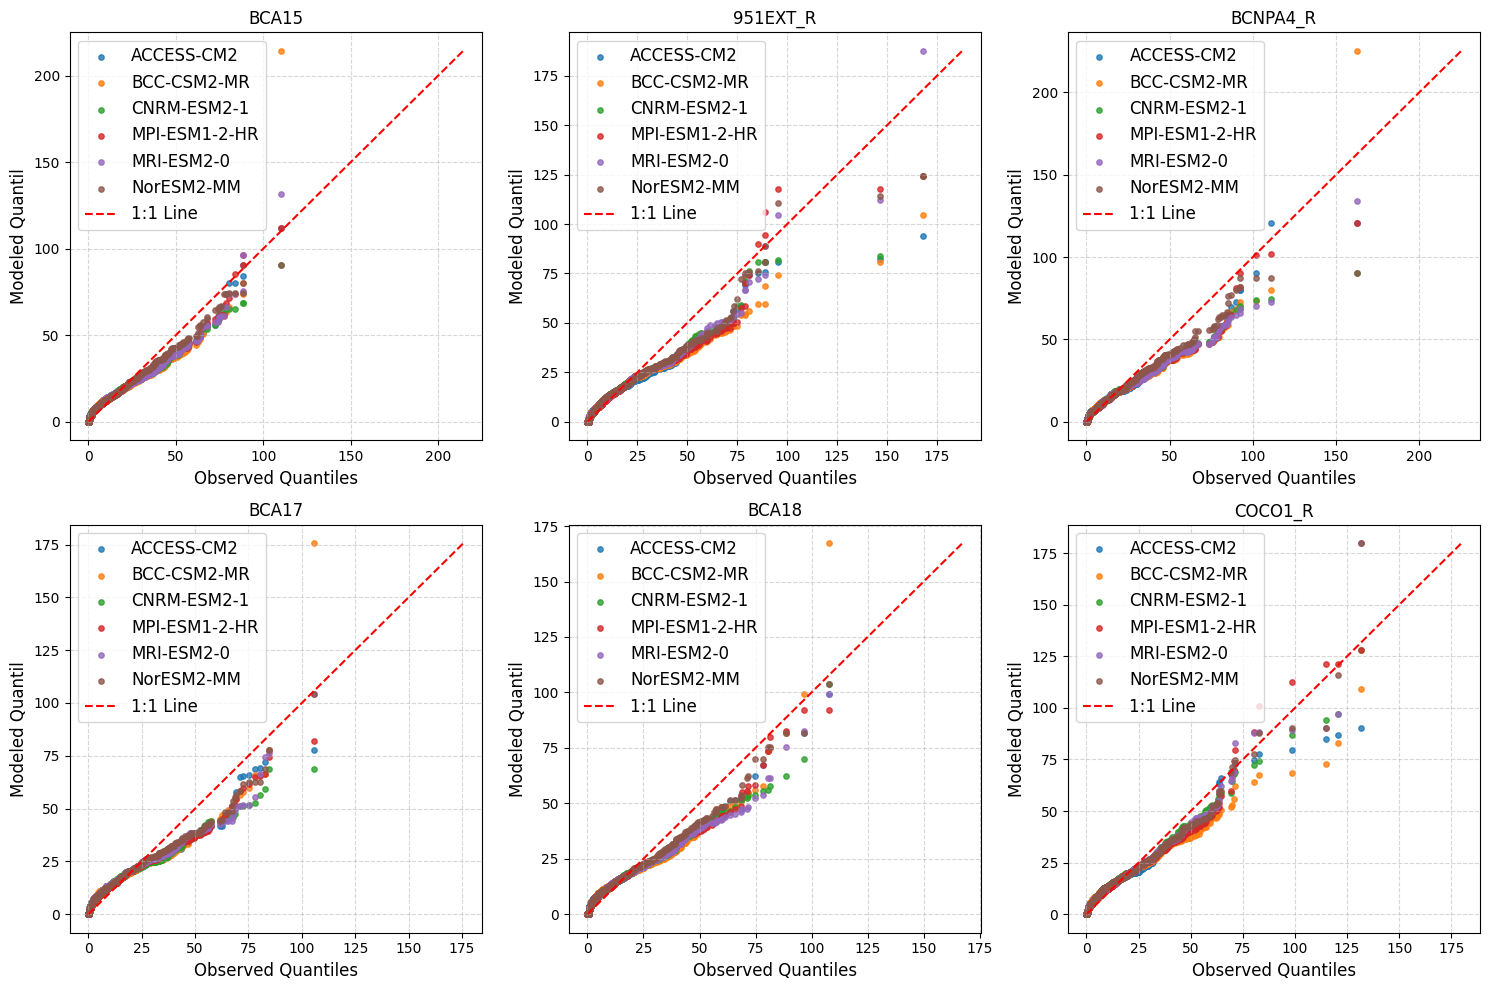

In [4]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define file paths for all stations
stations = ["BCA15", "951EXT_R", "BCNPA4_R", "BCA17", "BCA18", "COCO1_R"]
file_paths = {station: f"Data/{station}.csv" for station in stations}

# Load observations data
observations_path = "Data/Observetions.csv"
observations_df = pd.read_csv(observations_path)

# Define columns of interest
models = ['ACCESS-CM2', 'BCC-CSM2-MR', 'CNRM-ESM2-1', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM']

# Function to load station data, merge observations, and clean
def load_and_merge_data(station, file_path):
    df = pd.read_csv(file_path)
    if station in observations_df.columns:
        df[station] = observations_df[station]  # Merge observation data using the station name
    else:
        print(f"Warning: {station} not found in observations.csv! Available columns: {list(observations_df.columns)}")
    
    # Drop NaNs if observation data was successfully merged
    if station in df.columns:
        df = df.dropna(subset=[station] + models)
    else:
        print(f"Error: No observation data found for {station}. Skipping NaN dropping.")
    
    return df

# Load all datasets with merged observations
dataframes = {station: load_and_merge_data(station, path) for station, path in file_paths.items()}

# Prepare to store evaluation metrics
metrics = []

# Set up a grid for Q-Q plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Loop over datasets and axes
for (station, df), ax in zip(dataframes.items(), axes):
    mean_observed = df[station].mean()
    
    # Calculate and store the evaluation metrics for each model (excluding Mean-Models)
    for model in models:
        observed = np.sort(df[station])
        modeled = np.sort(df[model])
        
        # Compute metrics
        rmse = np.sqrt(mean_squared_error(observed, modeled))
        mae = mean_absolute_error(observed, modeled)
        r2 = r2_score(observed, modeled)
        mbe = np.mean(df[model]) - mean_observed
        mean_model = df[model].mean()
        
        # Store metrics in the list
        metrics.append({
            'Station': station,
            'Model': model,
            'R²': f"{r2:.2f}",
            'MAE': f"{mae:.2f}",
            'ME': f"{mbe:.2f}",
            'RMSE': f"{rmse:.2f}",
        })
        
        # Compute quantiles for Q-Q plot
        quantiles = np.linspace(0, 1, len(observed))
        obs_quantiles = np.quantile(observed, quantiles)
        mod_quantiles = np.quantile(modeled, quantiles)
        
        # Q-Q plot (remove metrics from the legend)
        ax.scatter(obs_quantiles, mod_quantiles, s=15, alpha=0.8, label=model)
    
    # Plot 1:1 reference line
    max_val = max(df[station].max(), df[models].max().max())  
    ax.plot([0, max_val], [0, max_val], 'r--', label='1:1 Line')
    
    # Formatting
    ax.set_xlabel("Observed Quantiles", fontsize=12)
    ax.set_ylabel("Modeled Quantil", fontsize=12)
    ax.set_title(f"{station}", fontsize=12)
    ax.legend(loc="upper left", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("Data/Q-Q_Plot.png")
plt.show()

# Convert the metrics list to a DataFrame for tabular display
metrics_df = pd.DataFrame(metrics)

# Print the table of metrics
#print(metrics_df.to_string(index=False))


In [14]:
keyword= 'BCA15'
mask= metrics_df['Station'].str.contains(keyword)
BCA15_Data= metrics_df.copy()
BCA15_Data= BCA15_Data[mask]
BCA15_Data

,Station,Model,R²,MAE,ME,RMSE
0,BCA15,ACCESS-CM2,0.95,1.10,0.28,2.34
1,BCA15,BCC-CSM2-MR,0.90,1.19,0.25,3.16
2,BCA15,CNRM-ESM2-1,0.95,0.99,0.14,2.36
3,BCA15,MPI-ESM1-2-HR,0.96,0.92,0.15,2.14
4,BCA15,MRI-ESM2-0,0.94,1.08,0.26,2.40
5,BCA15,NorESM2-MM,0.97,0.87,0.32,1.82


In [18]:
keyword= '951EXT_R'
mask= metrics_df['Station'].str.contains(keyword)
EXT_R_Data= metrics_df.copy()
EXT_R_Data= EXT_R_Data[mask]
EXT_R_Data

,Station,Model,R²,MAE,ME,RMSE
6,951EXT_R,ACCESS-CM2,0.91,1.10,-0.01,3.17
7,951EXT_R,BCC-CSM2-MR,0.90,1.11,-0.04,3.39
8,951EXT_R,CNRM-ESM2-1,0.94,0.89,0.01,2.62
9,951EXT_R,MPI-ESM1-2-HR,0.94,0.85,-0.11,2.73
10,951EXT_R,MRI-ESM2-0,0.95,0.92,0.04,2.46
11,951EXT_R,NorESM2-MM,0.95,0.87,-0.01,2.43


In [19]:
keyword= 'BCA17'
mask= metrics_df['Station'].str.contains(keyword)
BCA17_Data= metrics_df.copy()
BCA17_Data= BCA17_Data[mask]
BCA17_Data

,Station,Model,R²,MAE,ME,RMSE
18,BCA17,ACCESS-CM2,0.91,1.29,0.56,2.76
19,BCA17,BCC-CSM2-MR,0.89,1.31,0.57,2.98
20,BCA17,CNRM-ESM2-1,0.91,1.17,0.36,2.75
21,BCA17,MPI-ESM1-2-HR,0.93,1.05,0.38,2.40
22,BCA17,MRI-ESM2-0,0.92,1.21,0.53,2.66
23,BCA17,NorESM2-MM,0.94,1.05,0.48,2.31


In [20]:
keyword= 'BCA18'
mask= metrics_df['Station'].str.contains(keyword)
BCA18_Data= metrics_df.copy()
BCA18_Data= BCA18_Data[mask]
BCA18_Data

,Station,Model,R²,MAE,ME,RMSE
24,BCA18,ACCESS-CM2,0.93,1.19,0.29,2.52
25,BCA18,BCC-CSM2-MR,0.92,1.23,0.25,2.84
26,BCA18,CNRM-ESM2-1,0.94,1.05,0.11,2.48
27,BCA18,MPI-ESM1-2-HR,0.94,1.00,0.12,2.34
28,BCA18,MRI-ESM2-0,0.93,1.16,0.19,2.65
29,BCA18,NorESM2-MM,0.96,0.99,0.30,2.07


In [21]:
keyword= 'BCNPA4_R'
mask= metrics_df['Station'].str.contains(keyword)
BCNPA4_R_Data= metrics_df.copy()
BCNPA4_R_Data= BCNPA4_R_Data[mask]
BCNPA4_R_Data

,Station,Model,R²,MAE,ME,RMSE
12,BCNPA4_R,ACCESS-CM2,0.93,1.13,-0.07,3.00
13,BCNPA4_R,BCC-CSM2-MR,0.91,1.18,-0.08,3.36
14,BCNPA4_R,CNRM-ESM2-1,0.92,1.06,-0.11,3.19
15,BCNPA4_R,MPI-ESM1-2-HR,0.93,0.96,-0.19,2.90
16,BCNPA4_R,MRI-ESM2-0,0.92,1.10,-0.11,3.10
17,BCNPA4_R,NorESM2-MM,0.95,0.86,0.01,2.46


In [22]:
keyword= 'COCO1_R'
mask= metrics_df['Station'].str.contains(keyword)
COCO1_R_Data= metrics_df.copy()
COCO1_R_Data= COCO1_R_Data[mask]
COCO1_R_Data

,Station,Model,R²,MAE,ME,RMSE
30,COCO1_R,ACCESS-CM2,0.95,0.98,0.32,2.22
31,COCO1_R,BCC-CSM2-MR,0.93,1.08,0.31,2.58
32,COCO1_R,CNRM-ESM2-1,0.97,0.83,0.36,1.75
33,COCO1_R,MPI-ESM1-2-HR,0.97,0.79,0.23,1.81
34,COCO1_R,MRI-ESM2-0,0.96,0.88,0.41,2.01
35,COCO1_R,NorESM2-MM,0.96,0.86,0.37,1.98
